In [1]:
import altair as alt
from pathlib import Path
import json
import pandas as pd
import numpy as np

In [2]:
def opt_names(string):
    suf = '-'.join(string.split('/')[-1].split('-')[2:])
    name_map = {
        'all': 'both',
        'no-rs': 'minimize regs',
        'no-mr': 'resource sharing',
        'no-mr-rs': 'none',
        'no-static': 'dynamic'
    }
    return name_map[suf]

def rename(df):
    df = df.copy()
    df['benchmark'] = df['benchmark'].apply(lambda x: x.split('-')[-1])
    df['optimization'] = df['source'].apply(opt_names)
    return df

def normalize(df, col):
    df = df.copy()
    key = f"{col}_norm"
    df.insert(len(d.columns), key, 0.0)
    for idx, row in df.iterrows():
#         print(df.iloc[idx])
        bench_filt = df['benchmark'] == row['benchmark']
        baseline_filt = df['optimization'] == 'both'
        opt_filt = df['optimization'] == row['optimization']
        norm = float(row[col]) / df[(bench_filt) & (baseline_filt)][col].values[0]
        df.at[idx, key] = norm
    return df

In [170]:
test_run = '../pldi_results/test_run/results.csv'
complete0 = '../pldi_results/complete0/results.csv'

In [171]:
test_run_data = rename(pd.read_csv(test_run))
complete0_data = rename(pd.read_csv(complete0))

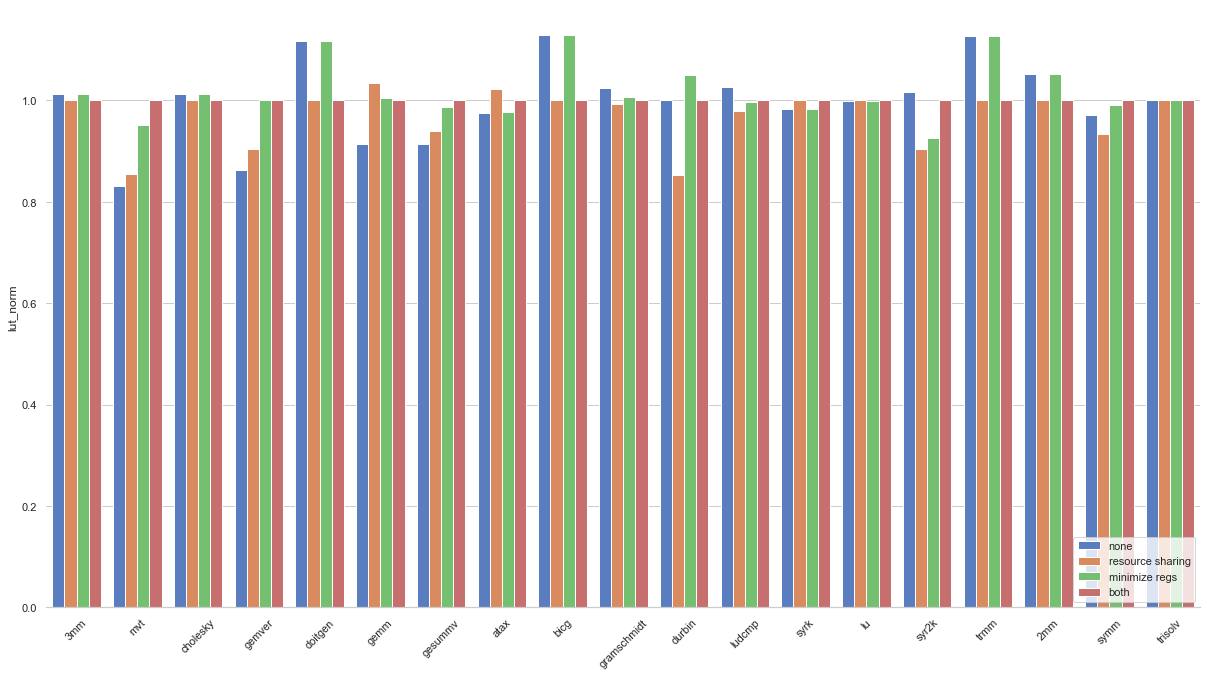

In [177]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid")

d = complete0_data
d = d[d['type'] == 'futil']
d = normalize(d, 'lut')

d = d[d['optimization'] != 'dynamic']

d = d.sort_values(by='optimization')

g = sns.catplot(
    x="benchmark",
    y="lut_norm",
    hue="optimization", 
    data=d,
    kind="bar", 
    palette="muted",
    legend=False,
    hue_order=['none', 'resource sharing', 'minimize regs', 'both']
)
g.despine(left=True)
g.set_xlabels("")
g.set_xticklabels(rotation=45)
g.axes[0,0].legend(loc='lower right').set_title('')
g.fig.set_size_inches(20,10)
# d[(d['optimization'] == 'no-mr')].sort_values(by='benchmark')
# d[(d['optimization'] == 'all')].sort_values(by='benchmark')

In [172]:
complete0_data

,benchmark,type,lut,dsp,latency,registers,muxes,meet_timing,source,optimization
0,3mm,hls,742,9,5043,0.0,0.0,1,pldi_results/complete0/Nov17-10-no-static,dynamic
1,3mm,futil,533,9,0,155.0,180.0,1,pldi_results/complete0/Nov17-10-no-static,dynamic
2,symm,hls,549,15,2033,0.0,0.0,1,pldi_results/complete0/Nov17-10-no-static,dynamic
3,symm,futil,711,21,0,155.0,154.0,1,pldi_results/complete0/Nov17-10-no-static,dynamic
4,2mm,hls,939,12,3718,0.0,0.0,1,pldi_results/complete0/Nov17-10-no-static,dynamic
...,...,...,...,...,...,...,...,...,...,...
185,cholesky,futil,597,6,0,115.0,128.0,1,pldi_results/complete0/Nov17-8-no-rs,minimize regs
186,mvt,hls,657,6,597,0.0,0.0,1,pldi_results/complete0/Nov17-8-no-rs,minimize regs
187,mvt,futil,1382,6,0,225.0,302.0,1,pldi_results/complete0/Nov17-8-no-rs,minimize regs
188,gramschmidt,hls,1662,9,8605,0.0,0.0,1,pldi_results/complete0/Nov17-8-no-rs,minimize regs
